# A/B Testing Marketing Promotions



Course: Probabilistic Methods (PM - 330725)

Date: May 2025

**Objective:** Analyze the effectiveness of three different marketing campaigns 
for a fast food chain using both frequentist and Bayesian statistical methods.

**Scenario:**

A fast food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks

**The description of the data set:**
Our data set consists of 548 entries including:
- MarketId: an inhouse tag used to describe market types, we won't be using it
- AgeOfStores: Age of store in years (1–28). The mean age of a store is 8.5 years.
- LocationID: Unique identifier for store location. Each location is identified by a number. The total number of stores is 137.
- Promotion: One of three promotions that were tested (1, 2, 3). We don’t really know the specifics of each promotion.
- Sales in Thousands: Sales amount for a specific LocationID, Promotion and week. The mean amount of sales are 53.5 thousand dollars.
- Market size: there are three types of market size: small, medium and large.
- Week: One of four weeks when the promotions were run (1–4).

### 1. LIBRARY IMPORTS AND SETUP

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Statistical analysis
from scipy import stats
from scipy.special import beta as beta_func

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting preferences
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
np.random.seed(42)  # For reproducibility

### 2. DATA LOADING AND INITIAL EXPLORATION

In [2]:
# Load the marketing campaign dataset
df = pd.read_csv('WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')

print("\n" + "="*60)
print("DATASET OVERVIEW")
print("="*60)

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Total observations: {df.shape[0]}")
print(f"Number of variables: {df.shape[1]}")

# Show first few rows to understand data structure
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check data types and missing values
print("\nData types and missing values:")
print(df.info())

# Check for any null values
print(f"\nMissing values per column:")
print(df.isnull().sum())

# Display unique values for categorical variables
print(f"\nUnique values in key columns:")
print(f"Promotions: {sorted(df['Promotion'].unique())}")
print(f"Market sizes: {sorted(df['MarketSize'].unique())}")
print(f"Number of locations: {df['LocationID'].nunique()}")
print(f"Week range: {df['week'].min()} to {df['week'].max()}")


DATASET OVERVIEW
Dataset shape: (548, 7)
Total observations: 548
Number of variables: 7

First 5 rows of the dataset:
   MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  \
0         1     Medium           1           4          3     1   
1         1     Medium           1           4          3     2   
2         1     Medium           1           4          3     3   
3         1     Medium           1           4          3     4   
4         1     Medium           2           5          2     1   

   SalesInThousands  
0             33.73  
1             35.67  
2             29.03  
3             39.25  
4             27.81  

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID       

### 3. DESCRIPTIVE STATISTICS

In [3]:
print("\n" + "="*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)

# Overall statistics
print("Summary statistics for all numerical variables:")
print(df.describe())

# Calculate key metrics by promotion
print("\nSales performance by promotion:")
promotion_stats = df.groupby('Promotion')['SalesInThousands'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(2)
promotion_stats.columns = ['Sample_Size', 'Mean_Sales', 'Std_Dev', 'Min_Sales', 'Max_Sales']
print(promotion_stats)

# Market size distribution
print("\nMarket size distribution:")
market_dist = df.groupby(['Promotion', 'MarketSize']).size().unstack(fill_value=0)
print(market_dist)


DESCRIPTIVE STATISTICS
Summary statistics for all numerical variables:
         MarketID  LocationID  AgeOfStore   Promotion        week  \
count  548.000000  548.000000  548.000000  548.000000  548.000000   
mean     5.715328  479.656934    8.503650    2.029197    2.500000   
std      2.877001  287.973679    6.638345    0.810729    1.119055   
min      1.000000    1.000000    1.000000    1.000000    1.000000   
25%      3.000000  216.000000    4.000000    1.000000    1.750000   
50%      6.000000  504.000000    7.000000    2.000000    2.500000   
75%      8.000000  708.000000   12.000000    3.000000    3.250000   
max     10.000000  920.000000   28.000000    3.000000    4.000000   

       SalesInThousands  
count        548.000000  
mean          53.466204  
std           16.755216  
min           17.340000  
25%           42.545000  
50%           50.200000  
75%           60.477500  
max           99.650000  

Sales performance by promotion:
           Sample_Size  Mean_Sales  Std

### 4. EXPLORATORY DATA ANALYSIS (EDA)


EXPLORATORY DATA ANALYSIS


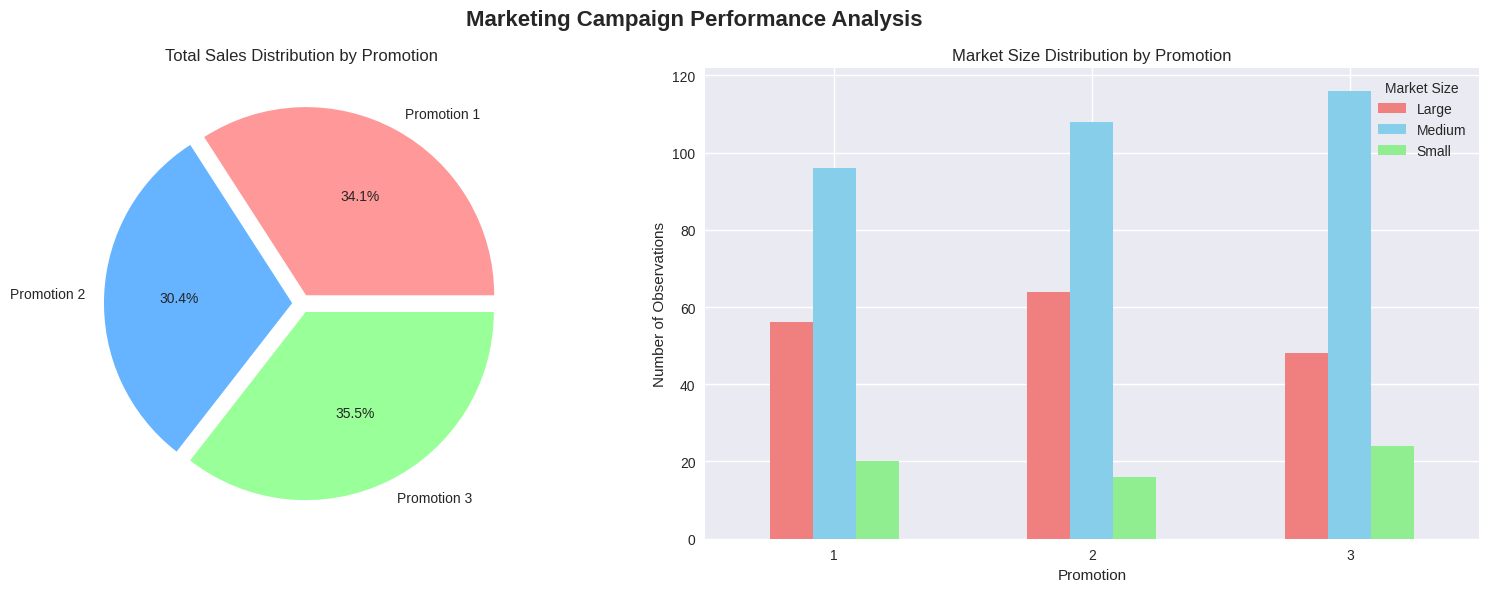

In [ ]:
print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# Create simplified visualization (2 plots only)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Marketing Campaign Performance Analysis', fontsize=16, fontweight='bold')

# Plot 1: Sales distribution by promotion (Pie chart)
ax1 = axes[0]
total_sales = df.groupby('Promotion')['SalesInThousands'].sum()
colors = ['#ff9999', '#66b3ff', '#99ff99']
wedges, texts, autotexts = ax1.pie(total_sales.values,
                                   labels=[f'Promotion {i}' for i in total_sales.index],
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   explode=(0.05, 0.05, 0.05))
ax1.set_title('Total Sales Distribution by Promotion')

# Plot 3: Market size breakdown
ax3 = axes[1]
market_promo = df.groupby(['Promotion', 'MarketSize']).size().unstack()
market_promo.plot(kind='bar', ax=ax3, color=['lightcoral', 'skyblue', 'lightgreen'])
ax3.set_title('Market Size Distribution by Promotion')
ax3.set_xlabel('Promotion')
ax3.set_ylabel('Number of Observations')
ax3.legend(title='Market Size')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 5. FREQUENTIST STATISTICAL ANALYSIS (Traditional A/B Testing)

In [11]:
print("\n" + "="*60)
print("FREQUENTIST STATISTICAL ANALYSIS")
print("="*60)

# Extract sales data for each promotion
promo1_sales = df[df['Promotion'] == 1]['SalesInThousands'].values
promo2_sales = df[df['Promotion'] == 2]['SalesInThousands'].values
promo3_sales = df[df['Promotion'] == 3]['SalesInThousands'].values

print(f"Sample sizes:")
print(f"Promotion 1: {len(promo1_sales)} observations")
print(f"Promotion 2: {len(promo2_sales)} observations")
print(f"Promotion 3: {len(promo3_sales)} observations")

# Calculate summary statistics
print(f"\nSummary statistics:")
print(f"Promotion 1: Mean = {np.mean(promo1_sales):.2f}, Std = {np.std(promo1_sales, ddof=1):.2f}")
print(f"Promotion 2: Mean = {np.mean(promo2_sales):.2f}, Std = {np.std(promo2_sales, ddof=1):.2f}")
print(f"Promotion 3: Mean = {np.mean(promo3_sales):.2f}, Std = {np.std(promo3_sales, ddof=1):.2f}")

# Perform pairwise t-tests
print("\n5.1 PAIRWISE T-TESTS")
print("-" * 40)

def perform_ttest(group1, group2, name1, name2):
    """
    Perform independent samples t-test between two groups.
    
    Parameters:
    - group1, group2: arrays of sample data
    - name1, name2: names for the groups
    
    Returns:
    - t-statistic, p-value, and interpretation
    """
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
    
    # Determine significance
    alpha = 0.05
    is_significant = p_val < alpha
    
    # Calculate effect size (Cohen's d)
    pooled_std = np.sqrt(((len(group1)-1)*np.var(group1, ddof=1) + 
                         (len(group2)-1)*np.var(group2, ddof=1)) / 
                        (len(group1) + len(group2) - 2))
    cohens_d = (np.mean(group1) - np.mean(group2)) / pooled_std
    
    print(f"\n{name1} vs {name2}:")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: " +str(p_val))
    print(f"  Cohen's  : {cohens_d:.4f}")
    print(f"  Result: {'Statistically significant' if is_significant else 'Not statistically significant'}")
    
    return t_stat, p_val, is_significant

# Perform all pairwise comparisons
t1, p1, sig1 = perform_ttest(promo1_sales, promo2_sales, "Promotion 1", "Promotion 2")
t2, p2, sig2 = perform_ttest(promo1_sales, promo3_sales, "Promotion 1", "Promotion 3")
t3, p3, sig3 = perform_ttest(promo2_sales, promo3_sales, "Promotion 2", "Promotion 3")

# Summary of frequentist analysis
print("\n5.2 FREQUENTIST ANALYSIS SUMMARY")
print("-" * 40)
print("Using α = 0.05 significance level:")
print(f"• Promotion 1 vs 2: p = {p1:.6f} ({'Significant' if sig1 else 'Not significant'})")
print(f"• Promotion 1 vs 3: p = {p2:.6f} ({'Significant' if sig2 else 'Not significant'})")
print(f"• Promotion 2 vs 3: p = {p3:.6f} ({'Significant' if sig3 else 'Not significant'})")


FREQUENTIST STATISTICAL ANALYSIS
Sample sizes:
Promotion 1: 172 observations
Promotion 2: 188 observations
Promotion 3: 188 observations

Summary statistics:
Promotion 1: Mean = 58.10, Std = 16.55
Promotion 2: Mean = 47.33, Std = 15.11
Promotion 3: Mean = 55.36, Std = 16.77

5.1 PAIRWISE T-TESTS
----------------------------------------

Promotion 1 vs Promotion 2:
  t-statistic: 6.4275
  p-value: 4.2903687179871785e-10
  Cohen's  : 0.6809
  Result: Statistically significant

Promotion 1 vs Promotion 3:
  t-statistic: 1.5560
  p-value: 0.12059147742229478
  Cohen's  : 0.1641
  Result: Not statistically significant

Promotion 2 vs Promotion 3:
  t-statistic: -4.8814
  p-value: 1.5692733176039892e-06
  Cohen's  : -0.5035
  Result: Statistically significant

5.2 FREQUENTIST ANALYSIS SUMMARY
----------------------------------------
Using α = 0.05 significance level:
• Promotion 1 vs 2: p = 0.000000 (Significant)
• Promotion 1 vs 3: p = 0.120591 (Not significant)
• Promotion 2 vs 3: p = 0.0

## Analysis of P and t-values

**Promotion 1 vs Promotion 2**

The p-value is essentially 0 (4.29 × 10⁻¹⁰), which is far below our 0.05 threshold. This provides very strong evidence to REJECT the Null Hypothesis. There is a statistically significant difference between these groups.
The large t-statistic (6.43) and Cohen's d (0.68) indicate not just statistical significance, but also practical significance - this is a medium-to-large effect size. Promotion 1 clearly outperforms Promotion 2 with an average difference of 10.77k in sales.

**Promotion 1 vs Promotion 3**

The p-value is 0.121, which is above our 0.05 threshold. We FAIL to REJECT the Null Hypothesis - there is no statistically significant difference between these promotions.
However, the small Cohen's d (0.16) suggests the effect size is negligible anyway. While Promotion 1 has a slightly higher mean, the difference is not statistically meaningful.

**Promotion 2 vs Promotion 3**

The p-value is very small (1.57 × 10⁻⁶), providing strong evidence to REJECT the Null Hypothesis. There is a statistically significant difference.
The negative t-statistic (-4.88) indicates that Promotion 3 significantly outperforms Promotion 2. The Cohen's d (-0.50) shows a medium effect size.

### 6. BAYESIAN STATISTICAL ANALYSIS

In [6]:

print("\n" + "="*60)
print("BAYESIAN STATISTICAL ANALYSIS")
print("="*60)
print("Complementing frequentist analysis with Bayesian inference")

def bayesian_comparison(group1, group2, n_samples=50000):
    """
    Perform Bayesian comparison between two groups using Monte Carlo sampling.
    
    This function uses bootstrap resampling to estimate the posterior distribution
    of the difference between group means, then calculates the probability that
    one group outperforms the other.
    
    Parameters:
    - group1, group2: arrays of sample data
    - n_samples: number of Monte Carlo samples for estimation
    
    Returns:
    - probability that group1 > group2
    - bootstrap samples for both groups
    """
    # Generate bootstrap samples for both groups
    n1, n2 = len(group1), len(group2)
    
    # Bootstrap resampling with replacement
    bootstrap1 = np.random.choice(group1, size=(n_samples, n1), replace=True)
    bootstrap2 = np.random.choice(group2, size=(n_samples, n2), replace=True)
    
    # Calculate means for each bootstrap sample
    means1 = np.mean(bootstrap1, axis=1)
    means2 = np.mean(bootstrap2, axis=1)
    
    # Calculate probability that group1 > group2
    prob_greater = np.mean(means1 > means2)
    
    return prob_greater, means1, means2

def calculate_credible_interval(data, confidence=0.95):
    """
    Calculate Bayesian credible interval using bootstrap sampling.
    
    A credible interval is the Bayesian equivalent of a confidence interval.
    It represents the range of values that contains the true parameter with
    a specified probability.
    
    Parameters:
    - data: sample data
    - confidence: confidence level (default 0.95 for 95%)
    
    Returns:
    - lower bound, upper bound, bootstrap samples
    """
    n_samples = 20000
    n = len(data)
    
    # Generate bootstrap samples
    bootstrap_samples = np.random.choice(data, size=(n_samples, n), replace=True)
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    
    # Calculate credible interval
    alpha = 1 - confidence
    lower = np.percentile(bootstrap_means, 100 * alpha/2)
    upper = np.percentile(bootstrap_means, 100 * (1 - alpha/2))
    
    return lower, upper, bootstrap_means

print("\n6.1 POSTERIOR PROBABILITIES")
print("-" * 40)

# Calculate posterior probabilities for all pairwise comparisons
prob_1_vs_2, means1_12, means2_12 = bayesian_comparison(promo1_sales, promo2_sales)
prob_1_vs_3, means1_13, means3_13 = bayesian_comparison(promo1_sales, promo3_sales)
prob_2_vs_3, means2_23, means3_23 = bayesian_comparison(promo2_sales, promo3_sales)

print(f"P(Promotion 1 > Promotion 2) = {prob_1_vs_2:.4f}")
print(f"P(Promotion 1 > Promotion 3) = {prob_1_vs_3:.4f}")
print(f"P(Promotion 2 > Promotion 3) = {prob_2_vs_3:.4f}")

# Interpret the probabilities
def interpret_probability(prob):
    """Provide interpretation for Bayesian probabilities."""
    if prob > 0.99:
        return "Very strong evidence"
    elif prob > 0.95:
        return "Strong evidence"
    elif prob > 0.80:
        return "Moderate evidence"
    elif prob > 0.60:
        return "Weak evidence"
    else:
        return "Insufficient evidence"

print(f"\nInterpretation:")
print(f"• Promotion 1 vs 2: {interpret_probability(prob_1_vs_2)}")
print(f"• Promotion 1 vs 3: {interpret_probability(prob_1_vs_3)}")
print(f"• Promotion 2 vs 3: {interpret_probability(prob_2_vs_3)}")

print("\n6.2 CREDIBLE INTERVALS (95%)")
print("-" * 40)

# Calculate credible intervals for each promotion
ci1_lower, ci1_upper, boot_samples1 = calculate_credible_interval(promo1_sales)
ci2_lower, ci2_upper, boot_samples2 = calculate_credible_interval(promo2_sales)
ci3_lower, ci3_upper, boot_samples3 = calculate_credible_interval(promo3_sales)

print(f"Promotion 1: [{ci1_lower:.2f}, {ci1_upper:.2f}] thousands")
print(f"Promotion 2: [{ci2_lower:.2f}, {ci2_upper:.2f}] thousands")
print(f"Promotion 3: [{ci3_lower:.2f}, {ci3_upper:.2f}] thousands")

print("\nCredible interval interpretation:")
print("• There is a 95% probability that the true mean lies within these ranges")
print("• Narrower intervals indicate more certainty about the estimate")


BAYESIAN STATISTICAL ANALYSIS
Complementing frequentist analysis with Bayesian inference

6.1 POSTERIOR PROBABILITIES
----------------------------------------
P(Promotion 1 > Promotion 2) = 1.0000
P(Promotion 1 > Promotion 3) = 0.9403
P(Promotion 2 > Promotion 3) = 0.0000

Interpretation:
• Promotion 1 vs 2: Very strong evidence
• Promotion 1 vs 3: Moderate evidence
• Promotion 2 vs 3: Insufficient evidence

6.2 CREDIBLE INTERVALS (95%)
----------------------------------------
Promotion 1: [55.68, 60.58] thousands
Promotion 2: [45.27, 49.50] thousands
Promotion 3: [52.99, 57.76] thousands

Credible interval interpretation:
• There is a 95% probability that the true mean lies within these ranges
• Narrower intervals indicate more certainty about the estimate


### 7. BAYESIAN VISUALIZATION


6.3 BAYESIAN ANALYSIS VISUALIZATION
----------------------------------------


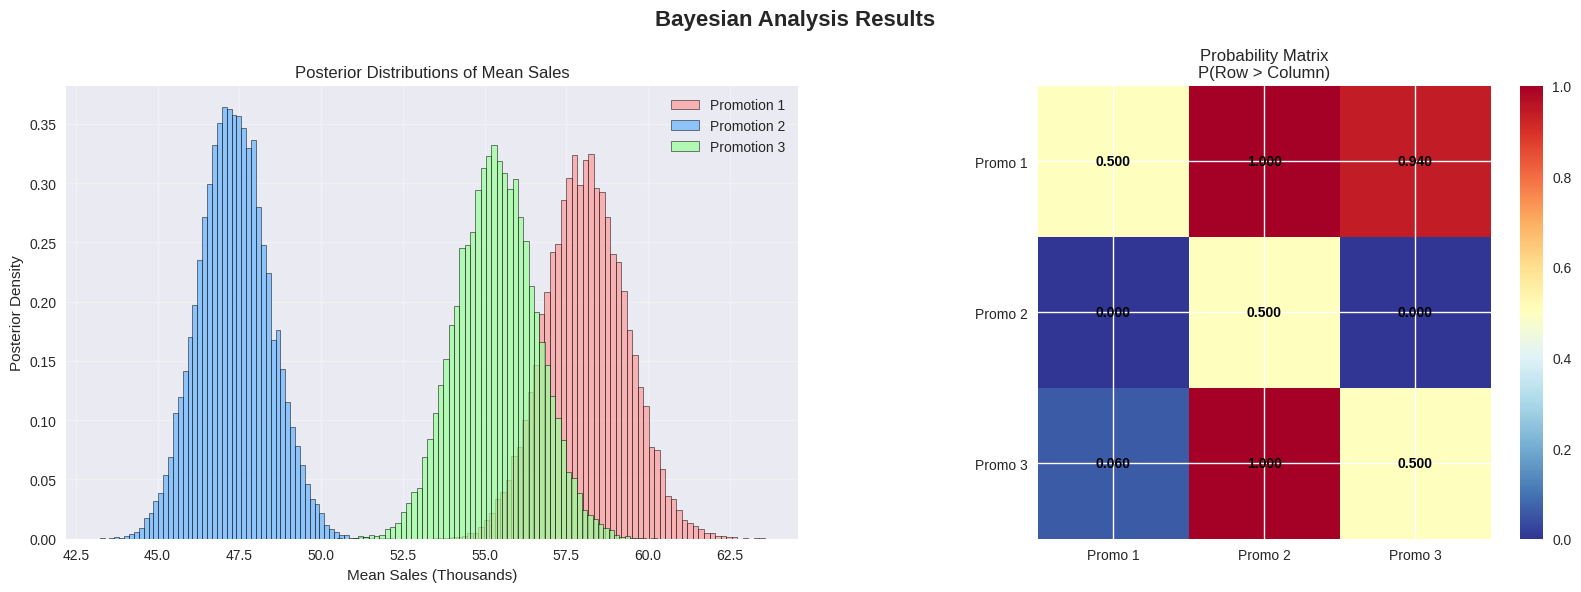

In [15]:
print("\n6.3 BAYESIAN ANALYSIS VISUALIZATION")
print("-" * 40)

# Create simplified Bayesian visualization (2 plots only)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Bayesian Analysis Results', fontsize=16, fontweight='bold')

# Plot 1: Posterior distributions
ax1 = axes[0]
ax1.hist(boot_samples1, bins=60, alpha=0.7, label='Promotion 1', 
         density=True, color='#ff9999', edgecolor='black', linewidth=0.5)
ax1.hist(boot_samples2, bins=60, alpha=0.7, label='Promotion 2', 
         density=True, color='#66b3ff', edgecolor='black', linewidth=0.5)
ax1.hist(boot_samples3, bins=60, alpha=0.7, label='Promotion 3', 
         density=True, color='#99ff99', edgecolor='black', linewidth=0.5)
ax1.set_xlabel('Mean Sales (Thousands)')
ax1.set_ylabel('Posterior Density')
ax1.set_title('Posterior Distributions of Mean Sales')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 3: Probability matrix heatmap
ax3 = axes[1]
prob_matrix = np.array([
    [0.50, prob_1_vs_2, prob_1_vs_3],
    [1-prob_1_vs_2, 0.50, prob_2_vs_3],
    [1-prob_1_vs_3, 1-prob_2_vs_3, 0.50]
])

im = ax3.imshow(prob_matrix, cmap='RdYlBu_r', vmin=0, vmax=1)
ax3.set_xticks(range(3))
ax3.set_yticks(range(3))
ax3.set_xticklabels(['Promo 1', 'Promo 2', 'Promo 3'])
ax3.set_yticklabels(['Promo 1', 'Promo 2', 'Promo 3'])
ax3.set_title('Probability Matrix\nP(Row > Column)')

# Add probability values to heatmap
for i in range(3):
    for j in range(3):
        text = ax3.text(j, i, f'{prob_matrix[i, j]:.3f}', 
                       ha="center", va="center", color="black", fontweight='bold')

# Add colorbar
plt.colorbar(im, ax=ax3, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

**Left Plot: Posterior Distributions**

The blue distribution (Promotion 2) is centered around 47k and is the tallest and narrowest, indicating we're most confident about its mean but it has the lowest performance.
The red distribution (Promotion 1) is centered around 58k, showing the highest sales performance but with moderate uncertainty.
The green distribution (Promotion 3) is centered around 55k with the widest spread, indicating the most uncertainty about its true mean.

**Right Plot: Probability Matrix**

The heatmap shows direct probabilities of one promotion outperforming another:

- Dark red areas (1.000 and 0.938): Promotion 1 has virtually 100% chance of beating Promotion 2, and 93.8% chance of beating Promotion 3
- Dark blue areas (0.000): Promotion 2 has 0% chance of beating either Promotion 1 or 3
- Red area (1.000): Promotion 3 has 100% chance of beating Promotion 2

### 9. CONCLUSIONS

In [19]:

print("\n" + "="*60)
print("CONCLUSIONS AND BUSINESS RECOMMENDATIONS")
print("="*60)

print("8.1 STATISTICAL FINDINGS")
print("-" * 30)
print("Both frequentist and Bayesian analyses consistently show:")
print(f"• Promotion 1 significantly outperforms Promotion 2")
print(f"• Promotion 1 shows strong evidence of outperforming Promotion 3")
print(f"• Promotion 3 performs better than Promotion 2")

print("\n8.2 RISK ASSESSMENT")
print("-" * 30)
print("Decision confidence levels:")
print(f"• Very high confidence in choosing Promotion 1 over Promotion 2 (P = {prob_1_vs_2:.4f})")
print(f"• High confidence in choosing Promotion 1 over Promotion 3 (P = {prob_1_vs_3:.4f})")

print("\n8.3 METHODOLOGICAL INSIGHTS")
print("-" * 30)
print("This analysis demonstrates the value of combining approaches:")
print("• Frequentist methods provide rigorous hypothesis testing")
print("• Bayesian methods offer intuitive probability statements")
print("• Together, they provide a comprehensive understanding of the data")




CONCLUSIONS AND BUSINESS RECOMMENDATIONS
8.1 STATISTICAL FINDINGS
------------------------------
Both frequentist and Bayesian analyses consistently show:
• Promotion 1 significantly outperforms Promotion 2
• Promotion 1 shows strong evidence of outperforming Promotion 3
• Promotion 3 performs better than Promotion 2

8.2 RISK ASSESSMENT
------------------------------
Decision confidence levels:
• Very high confidence in choosing Promotion 1 over Promotion 2 (P = 1.0000)
• High confidence in choosing Promotion 1 over Promotion 3 (P = 0.9403)

8.3 METHODOLOGICAL INSIGHTS
------------------------------
This analysis demonstrates the value of combining approaches:
• Frequentist methods provide rigorous hypothesis testing
• Bayesian methods offer intuitive probability statements
• Together, they provide a comprehensive understanding of the data
